In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import category_encoders as ce

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [38]:
cd = pd.read_csv('https://raw.githubusercontent.com/Varadad/Personalize_Pricing/main/Datasets/customer_data.csv')
ocd = pd.read_csv('https://raw.githubusercontent.com/Varadad/Personalize_Pricing/main/Datasets/order_customer_data.csv') #most important file
oid = pd.read_csv('https://raw.githubusercontent.com/Varadad/Personalize_Pricing/main/Datasets/order_item_data.csv')
opd = pd.read_csv('https://raw.githubusercontent.com/Varadad/Personalize_Pricing/main/Datasets/order_payment_data.csv')
pdd = pd.read_csv('https://raw.githubusercontent.com/Varadad/Personalize_Pricing/main/Datasets/product_data.csv')
pnd = pd.read_csv('https://raw.githubusercontent.com/Varadad/Personalize_Pricing/main/Datasets/product_name_data.csv')

In [39]:
# cd

In [40]:
# ocd

In [41]:
# oid

In [42]:
# opd

In [43]:
# pdd

In [44]:
# pnd

In [45]:
# cd left/full outer join with oid
# this join with opd
# join with pdd with product id as key

cd_oid = cd.join(oid,how = 'left')
cd_oid_opd = cd_oid.merge(opd, on = 'order_id', how = 'left')
cd_oid_opd_pdd = cd_oid_opd.merge(pdd, on = 'product_id', how = 'left')
cd_oid_opd_pdd_pnd = cd_oid_opd_pdd.merge(pnd, on = 'product_category_name', how ='left')

In [46]:
cd_oid_opd_pdd_pnd

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,seller_id,shipping_limit_date,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,...,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,...,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,...,216.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,...,25.78,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,...,218.04,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103801,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,e18cc7fc5eb938dd26feb68acbf88642,1,28ce57ecf4afba85e6020ec0209cada9,dc317f341ab0e22f39acbd9dbf9b4a1f,2018-01-10 23:28:23,...,319.11,cool_stuff,31.0,248.0,2.0,5650.0,73.0,73.0,20.0,cool_stuff
103802,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,e18cd51191ffbe2bca934d1d13805164,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2017-12-22 11:53:31,...,190.04,moveis_decoracao,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,furniture_decor
103803,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,e18cd51191ffbe2bca934d1d13805164,2,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2017-12-22 11:53:31,...,190.04,moveis_decoracao,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,furniture_decor
103804,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e18d0e097ef9cdd7894ed1b82a2b7479,1,41171e11f920c47deb1809edda2bf09d,c42fd8e4d47dfb18ce5222f2dd7752f9,2017-03-20 10:38:32,...,36.96,moveis_decoracao,64.0,669.0,4.0,200.0,16.0,16.0,16.0,furniture_decor


In [47]:
df = cd_oid_opd_pdd_pnd[['customer_id','order_id', 'product_id','product_category_name_english', 'customer_city', 'customer_state', 'price', 'freight_value','payment_value','product_weight_g', 'product_length_cm','product_height_cm','product_width_cm']]

In [48]:
df

,customer_id,order_id,product_id,product_category_name_english,customer_city,customer_state,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,franca,SP,58.90,13.29,72.19,650.0,28.0,9.0,14.0
1,18955e83d337fd6b2def6b18a428ac77,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,sao bernardo do campo,SP,239.90,19.93,259.83,30000.0,50.0,30.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,sao paulo,SP,199.00,17.87,216.87,3050.0,33.0,13.0,33.0
3,b2b6027bc5c5109e529d4dc6358b12c3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumery,mogi das cruzes,SP,12.99,12.79,25.78,200.0,16.0,10.0,15.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,garden_tools,campinas,SP,199.90,18.14,218.04,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103801,17ddf5dd5d51696bb3d7c6291687be6f,e18cc7fc5eb938dd26feb68acbf88642,28ce57ecf4afba85e6020ec0209cada9,cool_stuff,sao paulo,SP,249.90,69.21,319.11,5650.0,73.0,73.0,20.0
103802,e7b71a9017aa05c9a7fd292d714858e8,e18cd51191ffbe2bca934d1d13805164,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,taboao da serra,SP,75.00,20.02,190.04,2600.0,50.0,10.0,30.0
103803,5e28dfe12db7fb50a4b2f691faecea5e,e18cd51191ffbe2bca934d1d13805164,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,fortaleza,CE,75.00,20.02,190.04,2600.0,50.0,10.0,30.0
103804,56b18e2166679b8a959d72dd06da27f9,e18d0e097ef9cdd7894ed1b82a2b7479,41171e11f920c47deb1809edda2bf09d,furniture_decor,canoas,RS,26.00,10.96,36.96,200.0,16.0,16.0,16.0


So now we have to predit what a customer from a region will pay for a product id from a given city, state, freight_value and product type

Our prediction value is the Price and output should come as predicted price + freight_value 

In [49]:
#considering customer_id for training which will over fit the data giving high variance/overfitting the model
X1 = df[['product_category_name_english', 'customer_city', 'customer_state','price','freight_value', 'payment_value','product_weight_g', 'product_length_cm','product_height_cm','product_width_cm']]
X1

,product_category_name_english,customer_city,customer_state,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,cool_stuff,franca,SP,58.90,13.29,72.19,650.0,28.0,9.0,14.0
1,pet_shop,sao bernardo do campo,SP,239.90,19.93,259.83,30000.0,50.0,30.0,40.0
2,furniture_decor,sao paulo,SP,199.00,17.87,216.87,3050.0,33.0,13.0,33.0
3,perfumery,mogi das cruzes,SP,12.99,12.79,25.78,200.0,16.0,10.0,15.0
4,garden_tools,campinas,SP,199.90,18.14,218.04,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...
103801,cool_stuff,sao paulo,SP,249.90,69.21,319.11,5650.0,73.0,73.0,20.0
103802,furniture_decor,taboao da serra,SP,75.00,20.02,190.04,2600.0,50.0,10.0,30.0
103803,furniture_decor,fortaleza,CE,75.00,20.02,190.04,2600.0,50.0,10.0,30.0
103804,furniture_decor,canoas,RS,26.00,10.96,36.96,200.0,16.0,16.0,16.0


# **NN with Target encoding on number of orders**

In [50]:
#creating the count of orders from every city
city = X1['customer_city'].value_counts().reset_index()
city.columns = ['customer_city', 'count']
city

,customer_city,count
0,sao paulo,16185
1,rio de janeiro,7265
2,belo horizonte,2902
3,brasilia,2204
4,curitiba,1567
...,...,...
4114,inhuma,1
4115,nova guarita,1
4116,lago verde,1
4117,gramado xavier,1


In [51]:
city_encoded = X1.merge(city, on = 'customer_city', how ='left')
encoder=ce.TargetEncoder(cols='customer_city') 
city_encoded['customer_city_encoded'] = encoder.fit_transform(city_encoded['customer_city'],city_encoded['count'])
city_encoded

,product_category_name_english,customer_city,customer_state,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,count,customer_city_encoded
0,cool_stuff,franca,SP,58.90,13.29,72.19,650.0,28.0,9.0,14.0,170,170.0
1,pet_shop,sao bernardo do campo,SP,239.90,19.93,259.83,30000.0,50.0,30.0,40.0,976,976.0
2,furniture_decor,sao paulo,SP,199.00,17.87,216.87,3050.0,33.0,13.0,33.0,16185,16185.0
3,perfumery,mogi das cruzes,SP,12.99,12.79,25.78,200.0,16.0,10.0,15.0,400,400.0
4,garden_tools,campinas,SP,199.90,18.14,218.04,3750.0,35.0,40.0,30.0,1522,1522.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103801,cool_stuff,sao paulo,SP,249.90,69.21,319.11,5650.0,73.0,73.0,20.0,16185,16185.0
103802,furniture_decor,taboao da serra,SP,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,308,308.0
103803,furniture_decor,fortaleza,CE,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,692,692.0
103804,furniture_decor,canoas,RS,26.00,10.96,36.96,200.0,16.0,16.0,16.0,220,220.0


In [52]:
#Data frames for future use
city_level_encoding = city_encoded[['customer_city', 'customer_city_encoded']]
city_level_encoding

,customer_city,customer_city_encoded
0,franca,170.0
1,sao bernardo do campo,976.0
2,sao paulo,16185.0
3,mogi das cruzes,400.0
4,campinas,1522.0
...,...,...
103801,sao paulo,16185.0
103802,taboao da serra,308.0
103803,fortaleza,692.0
103804,canoas,220.0


In [53]:
#state level encoding
state = city_encoded['customer_state'].value_counts().reset_index()
state.columns = ['customer_state', 'count']
state

,customer_state,count
0,SP,43523
1,RJ,13501
2,MG,12104
3,RS,5755
4,PR,5234
5,SC,3809
6,BA,3528
7,DF,2213
8,ES,2145
9,GO,2097


In [54]:
state_encoded = city_encoded.merge(state, on = 'customer_state', how ='left')
import category_encoders as ce
encoder=ce.TargetEncoder(cols='customer_state') 
state_encoded['customer_state_encoded'] = encoder.fit_transform(state_encoded['customer_state'],state_encoded['count_y'])
state_encoded

,product_category_name_english,customer_city,customer_state,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,count_x,customer_city_encoded,count_y,customer_state_encoded
0,cool_stuff,franca,SP,58.90,13.29,72.19,650.0,28.0,9.0,14.0,170,170.0,43523,43523.0
1,pet_shop,sao bernardo do campo,SP,239.90,19.93,259.83,30000.0,50.0,30.0,40.0,976,976.0,43523,43523.0
2,furniture_decor,sao paulo,SP,199.00,17.87,216.87,3050.0,33.0,13.0,33.0,16185,16185.0,43523,43523.0
3,perfumery,mogi das cruzes,SP,12.99,12.79,25.78,200.0,16.0,10.0,15.0,400,400.0,43523,43523.0
4,garden_tools,campinas,SP,199.90,18.14,218.04,3750.0,35.0,40.0,30.0,1522,1522.0,43523,43523.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103801,cool_stuff,sao paulo,SP,249.90,69.21,319.11,5650.0,73.0,73.0,20.0,16185,16185.0,43523,43523.0
103802,furniture_decor,taboao da serra,SP,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,308,308.0,43523,43523.0
103803,furniture_decor,fortaleza,CE,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,692,692.0,1401,1401.0
103804,furniture_decor,canoas,RS,26.00,10.96,36.96,200.0,16.0,16.0,16.0,220,220.0,5755,5755.0


In [55]:
#datdframe for future use
state_level_encoding = state_encoded[['customer_state','customer_state_encoded']]

In [56]:
#product category level encoding
category = state_encoded['product_category_name_english'].value_counts().reset_index()
category.columns = ['product_category_name_english', 'count']
category

,product_category_name_english,count
0,bed_bath_table,10437
1,health_beauty,8777
2,sports_leisure,7823
3,furniture_decor,7761
4,computers_accessories,7117
...,...,...
66,arts_and_craftmanship,23
67,cds_dvds_musicals,13
68,la_cuisine,13
69,fashion_childrens_clothes,7


In [57]:
category_encoded = state_encoded.merge(category, on = 'product_category_name_english', how ='left')
category_encoded

,product_category_name_english,customer_city,customer_state,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,count_x,customer_city_encoded,count_y,customer_state_encoded,count
0,cool_stuff,franca,SP,58.90,13.29,72.19,650.0,28.0,9.0,14.0,170,170.0,43523,43523.0,3518.0
1,pet_shop,sao bernardo do campo,SP,239.90,19.93,259.83,30000.0,50.0,30.0,40.0,976,976.0,43523,43523.0,1793.0
2,furniture_decor,sao paulo,SP,199.00,17.87,216.87,3050.0,33.0,13.0,33.0,16185,16185.0,43523,43523.0,7761.0
3,perfumery,mogi das cruzes,SP,12.99,12.79,25.78,200.0,16.0,10.0,15.0,400,400.0,43523,43523.0,3151.0
4,garden_tools,campinas,SP,199.90,18.14,218.04,3750.0,35.0,40.0,30.0,1522,1522.0,43523,43523.0,4065.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103801,cool_stuff,sao paulo,SP,249.90,69.21,319.11,5650.0,73.0,73.0,20.0,16185,16185.0,43523,43523.0,3518.0
103802,furniture_decor,taboao da serra,SP,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,308,308.0,43523,43523.0,7761.0
103803,furniture_decor,fortaleza,CE,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,692,692.0,1401,1401.0,7761.0
103804,furniture_decor,canoas,RS,26.00,10.96,36.96,200.0,16.0,16.0,16.0,220,220.0,5755,5755.0,7761.0


In [58]:
encoder=ce.TargetEncoder(cols='product_category_name_english') 
category_encoded['product_category_name'] = encoder.fit_transform(category_encoded['product_category_name_english'],category_encoded['count'])
category_encoded = category_encoded.dropna()

In [59]:
X = category_encoded[['customer_city_encoded', 'customer_state_encoded', 'product_category_name', 'freight_value','product_weight_g', 'product_length_cm','product_height_cm','product_width_cm']].dropna()
X

,customer_city_encoded,customer_state_encoded,product_category_name,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,170.0,43523.0,3518.0,13.29,650.0,28.0,9.0,14.0
1,976.0,43523.0,1793.0,19.93,30000.0,50.0,30.0,40.0
2,16185.0,43523.0,7761.0,17.87,3050.0,33.0,13.0,33.0
3,400.0,43523.0,3151.0,12.79,200.0,16.0,10.0,15.0
4,1522.0,43523.0,4065.0,18.14,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...
103801,16185.0,43523.0,3518.0,69.21,5650.0,73.0,73.0,20.0
103802,308.0,43523.0,7761.0,20.02,2600.0,50.0,10.0,30.0
103803,692.0,1401.0,7761.0,20.02,2600.0,50.0,10.0,30.0
103804,220.0,5755.0,7761.0,10.96,200.0,16.0,16.0,16.0


In [60]:
y = category_encoded[['price']]
y

,price
0,58.90
1,239.90
2,199.00
3,12.99
4,199.90
...,...
103801,249.90
103802,75.00
103803,75.00
103804,26.00


In [61]:
y.describe()

,price
count,102282.000000
mean,121.077388
std,183.405517
min,0.850000
25%,39.900000
50%,74.900000
75%,134.900000
max,6735.000000


In [62]:
X

,customer_city_encoded,customer_state_encoded,product_category_name,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,170.0,43523.0,3518.0,13.29,650.0,28.0,9.0,14.0
1,976.0,43523.0,1793.0,19.93,30000.0,50.0,30.0,40.0
2,16185.0,43523.0,7761.0,17.87,3050.0,33.0,13.0,33.0
3,400.0,43523.0,3151.0,12.79,200.0,16.0,10.0,15.0
4,1522.0,43523.0,4065.0,18.14,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...
103801,16185.0,43523.0,3518.0,69.21,5650.0,73.0,73.0,20.0
103802,308.0,43523.0,7761.0,20.02,2600.0,50.0,10.0,30.0
103803,692.0,1401.0,7761.0,20.02,2600.0,50.0,10.0,30.0
103804,220.0,5755.0,7761.0,10.96,200.0,16.0,16.0,16.0


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
X_train, X_test, y_train, y_test = X.iloc[0:80000, :], X.iloc[80000:, :], y.iloc[0:80000], y.iloc[80000:] 

In [ ]:
#defining the model and adding neural network layers
model = keras.Sequential(([
    layers.Dense(16, activation='relu', input_shape=[8]),
    layers.Dropout(0.2, seed=2),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
]))

In [ ]:
#compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'mean_squared_error', optimizer = optimizer, metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 500, validation_split = 0.3)

In [ ]:
import matplotlib.pyplot as plt
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(figsize=(14,8))
num_epochs = model_history.shape[0]
ax.plot(np.arange(0, num_epochs), model_history["mae"], 
        label="Training MAE", lw=3, color='r')
ax.plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="Validation MAE", lw=3, color='b')
ax.legend()
plt.tight_layout()
plt.show()

# **Baseline Linear Regression**

In [ ]:
#baseline model Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

In [ ]:
model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
r2 = r2_score(y_train,y_poly_pred)
print(rmse)
print(r2)

# **With Different Encoding**

In [63]:
X1 = X1.dropna()

In [64]:
city1 = X1.groupby('customer_city').sum().reset_index()
city1 = city1[['customer_city', 'payment_value']]
city1.columns = ['customer_city', 'payment_city']
city1

,customer_city,payment_city
0,abadia dos dourados,1147.12
1,abadiania,224.40
2,abaete,1534.16
3,abaetetuba,1051.10
4,abaiara,110.00
...,...,...
4098,xinguara,1196.07
4099,xique-xique,325.29
4100,zacarias,141.32
4101,ze doca,392.97


In [65]:
city1_encoded = X1.merge(city1, on = 'customer_city', how ='left')
encoder=ce.TargetEncoder(cols='customer_city') 
city1_encoded['customer_city1_encoded'] = encoder.fit_transform(city1_encoded['customer_city'],city1_encoded['payment_city'])
city1_encoded

,product_category_name_english,customer_city,customer_state,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_city,customer_city1_encoded
0,cool_stuff,franca,SP,58.90,13.29,72.19,650.0,28.0,9.0,14.0,35241.78,35241.78
1,pet_shop,sao bernardo do campo,SP,239.90,19.93,259.83,30000.0,50.0,30.0,40.0,163895.33,163895.33
2,furniture_decor,sao paulo,SP,199.00,17.87,216.87,3050.0,33.0,13.0,33.0,2745623.55,2745623.55
3,perfumery,mogi das cruzes,SP,12.99,12.79,25.78,200.0,16.0,10.0,15.0,76508.38,76508.38
4,garden_tools,campinas,SP,199.90,18.14,218.04,3750.0,35.0,40.0,30.0,274683.09,274683.09
...,...,...,...,...,...,...,...,...,...,...,...,...
102277,cool_stuff,sao paulo,SP,249.90,69.21,319.11,5650.0,73.0,73.0,20.0,2745623.55,2745623.55
102278,furniture_decor,taboao da serra,SP,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,49219.94,49219.94
102279,furniture_decor,fortaleza,CE,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,113254.85,113254.85
102280,furniture_decor,canoas,RS,26.00,10.96,36.96,200.0,16.0,16.0,16.0,35183.46,35183.46


In [66]:
state1 = X1.groupby('customer_state').sum().reset_index()
state1 = state1[['customer_state', 'payment_value']]
state1.columns = ['customer_state', 'payment_state']
state1

,customer_state,payment_state
0,AC,12861.12
1,AL,75962.73
2,AM,29284.79
3,AP,12055.28
4,BA,597959.30
5,CE,235832.48
6,DF,359400.32
7,ES,379393.73
8,GO,354799.45
9,MA,126256.07


In [67]:
state1_encoded = city1_encoded.merge(state1, on = 'customer_state', how ='left')
encoder=ce.TargetEncoder(cols='customer_state') 
state1_encoded['customer_state1_encoded'] = encoder.fit_transform(state1_encoded['customer_state'],state1_encoded['payment_state'])
state1_encoded

,product_category_name_english,customer_city,customer_state,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_city,customer_city1_encoded,payment_state,customer_state1_encoded
0,cool_stuff,franca,SP,58.90,13.29,72.19,650.0,28.0,9.0,14.0,35241.78,35241.78,7458064.05,7.458064e+06
1,pet_shop,sao bernardo do campo,SP,239.90,19.93,259.83,30000.0,50.0,30.0,40.0,163895.33,163895.33,7458064.05,7.458064e+06
2,furniture_decor,sao paulo,SP,199.00,17.87,216.87,3050.0,33.0,13.0,33.0,2745623.55,2745623.55,7458064.05,7.458064e+06
3,perfumery,mogi das cruzes,SP,12.99,12.79,25.78,200.0,16.0,10.0,15.0,76508.38,76508.38,7458064.05,7.458064e+06
4,garden_tools,campinas,SP,199.90,18.14,218.04,3750.0,35.0,40.0,30.0,274683.09,274683.09,7458064.05,7.458064e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102277,cool_stuff,sao paulo,SP,249.90,69.21,319.11,5650.0,73.0,73.0,20.0,2745623.55,2745623.55,7458064.05,7.458064e+06
102278,furniture_decor,taboao da serra,SP,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,49219.94,49219.94,7458064.05,7.458064e+06
102279,furniture_decor,fortaleza,CE,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,113254.85,113254.85,235832.48,2.358325e+05
102280,furniture_decor,canoas,RS,26.00,10.96,36.96,200.0,16.0,16.0,16.0,35183.46,35183.46,962571.20,9.625712e+05


In [68]:
category1 = X1.groupby('product_category_name_english').sum().reset_index()
category1 = category1[['product_category_name_english', 'payment_value']]
category1.columns = ['product_category_name_english', 'payment_category']
category1

,product_category_name_english,payment_category
0,agro_industry_and_commerce,105268.94
1,air_conditioning,74220.68
2,art,21895.20
3,arts_and_craftmanship,2011.85
4,audio,53184.89
...,...,...
66,stationery,277395.07
67,tablets_printing_image,9495.09
68,telephony,436001.67
69,toys,543900.61


In [69]:
category1_encoded = state1_encoded.merge(category1, on = 'product_category_name_english', how ='left')
encoder=ce.TargetEncoder(cols='product_category_name_english') 
category1_encoded['customer_category1_encoded'] = encoder.fit_transform(category1_encoded['product_category_name_english'],category1_encoded['payment_category'])
category1_encoded

,product_category_name_english,customer_city,customer_state,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_city,customer_city1_encoded,payment_state,customer_state1_encoded,payment_category,customer_category1_encoded
0,cool_stuff,franca,SP,58.90,13.29,72.19,650.0,28.0,9.0,14.0,35241.78,35241.78,7458064.05,7.458064e+06,688757.78,688757.78
1,pet_shop,sao bernardo do campo,SP,239.90,19.93,259.83,30000.0,50.0,30.0,40.0,163895.33,163895.33,7458064.05,7.458064e+06,273229.40,273229.40
2,furniture_decor,sao paulo,SP,199.00,17.87,216.87,3050.0,33.0,13.0,33.0,2745623.55,2745623.55,7458064.05,7.458064e+06,1275730.27,1275730.27
3,perfumery,mogi das cruzes,SP,12.99,12.79,25.78,200.0,16.0,10.0,15.0,76508.38,76508.38,7458064.05,7.458064e+06,445360.16,445360.16
4,garden_tools,campinas,SP,199.90,18.14,218.04,3750.0,35.0,40.0,30.0,274683.09,274683.09,7458064.05,7.458064e+06,754284.22,754284.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102277,cool_stuff,sao paulo,SP,249.90,69.21,319.11,5650.0,73.0,73.0,20.0,2745623.55,2745623.55,7458064.05,7.458064e+06,688757.78,688757.78
102278,furniture_decor,taboao da serra,SP,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,49219.94,49219.94,7458064.05,7.458064e+06,1275730.27,1275730.27
102279,furniture_decor,fortaleza,CE,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,113254.85,113254.85,235832.48,2.358325e+05,1275730.27,1275730.27
102280,furniture_decor,canoas,RS,26.00,10.96,36.96,200.0,16.0,16.0,16.0,35183.46,35183.46,962571.20,9.625712e+05,1275730.27,1275730.27


In [70]:
category1_encoded.columns


Index(['product_category_name_english', 'customer_city', 'customer_state',
       'price', 'freight_value', 'payment_value', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_city', 'customer_city1_encoded', 'payment_state',
       'customer_state1_encoded', 'payment_category',
       'customer_category1_encoded'],
      dtype='object')

In [71]:
X = category1_encoded[['customer_city1_encoded','customer_state1_encoded','customer_category1_encoded', 'freight_value','product_weight_g', 'product_length_cm','product_height_cm','product_width_cm']].dropna()
X

,customer_city1_encoded,customer_state1_encoded,customer_category1_encoded,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,35241.78,7.458064e+06,688757.78,13.29,650.0,28.0,9.0,14.0
1,163895.33,7.458064e+06,273229.40,19.93,30000.0,50.0,30.0,40.0
2,2745623.55,7.458064e+06,1275730.27,17.87,3050.0,33.0,13.0,33.0
3,76508.38,7.458064e+06,445360.16,12.79,200.0,16.0,10.0,15.0
4,274683.09,7.458064e+06,754284.22,18.14,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...
102277,2745623.55,7.458064e+06,688757.78,69.21,5650.0,73.0,73.0,20.0
102278,49219.94,7.458064e+06,1275730.27,20.02,2600.0,50.0,10.0,30.0
102279,113254.85,2.358325e+05,1275730.27,20.02,2600.0,50.0,10.0,30.0
102280,35183.46,9.625712e+05,1275730.27,10.96,200.0,16.0,16.0,16.0


In [72]:
y = category1_encoded[['price']].dropna()
y

,price
0,58.90
1,239.90
2,199.00
3,12.99
4,199.90
...,...
102277,249.90
102278,75.00
102279,75.00
102280,26.00


In [73]:
X_train, X_test, y_train, y_test = X.iloc[0:80000, :], X.iloc[80000:, :], y.iloc[0:80000], y.iloc[80000:] 

In [74]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [75]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [76]:
#defining the model and adding neural network layers
model = keras.Sequential(([
    layers.Dense(8, activation='relu', input_shape=[8]),
    layers.Dropout(0.3, seed=2),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
]))

In [77]:
#compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'mean_squared_error', optimizer = optimizer, metrics=['mae'])

In [78]:
history = model.fit(X_train_norm, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
2000/2000 [==============================] - 3s 2ms/step - loss: 33265.1602 - mae: 89.4899 - val_loss: 30230.4863 - val_mae: 83.5729
Epoch 2/100
2000/2000 [==============================] - 3s 1ms/step - loss: 30011.6230 - mae: 83.5362 - val_loss: 29328.8984 - val_mae: 78.3486
Epoch 3/100
2000/2000 [==============================] - 3s 1ms/step - loss: 29195.8301 - mae: 82.0055 - val_loss: 28525.7852 - val_mae: 80.5400
Epoch 4/100
2000/2000 [==============================] - 2s 1ms/step - loss: 28680.3438 - mae: 81.5040 - val_loss: 28264.6016 - val_mae: 78.8152
Epoch 5/100
2000/2000 [==============================] - 3s 2ms/step - loss: 28399.2109 - mae: 80.8295 - val_loss: 27890.5879 - val_mae: 80.2978
Epoch 6/100
2000/2000 [==============================] - 3s 1ms/step - loss: 28014.0098 - mae: 80.3005 - val_loss: 27539.6211 - val_mae: 77.9454
Epoch 7/100
2000/2000 [==============================] - 2s 1ms/step - loss: 28006.6543 - mae: 80.3075 - val_loss: 27403.4609 - va

2000/2000 [==============================] - 3s 2ms/step - loss: 26981.8379 - mae: 78.0601 - val_loss: 28110.2578 - val_mae: 71.8469
Epoch 58/100
2000/2000 [==============================] - 3s 2ms/step - loss: 27020.1328 - mae: 78.0354 - val_loss: 27907.7207 - val_mae: 71.0845
Epoch 59/100
2000/2000 [==============================] - 4s 2ms/step - loss: 26962.8848 - mae: 78.0067 - val_loss: 27564.0586 - val_mae: 72.8014
Epoch 60/100
2000/2000 [==============================] - 3s 1ms/step - loss: 26980.6797 - mae: 78.0760 - val_loss: 27424.3809 - val_mae: 73.7016
Epoch 61/100
2000/2000 [==============================] - 3s 1ms/step - loss: 26993.0801 - mae: 78.1900 - val_loss: 27933.4414 - val_mae: 71.3981
Epoch 62/100
2000/2000 [==============================] - 2s 1ms/step - loss: 26911.5195 - mae: 78.1649 - val_loss: 27791.4785 - val_mae: 71.4782
Epoch 63/100
2000/2000 [==============================] - 2s 1ms/step - loss: 26989.4941 - mae: 78.0681 - val_loss: 27344.2285 - val_mae:

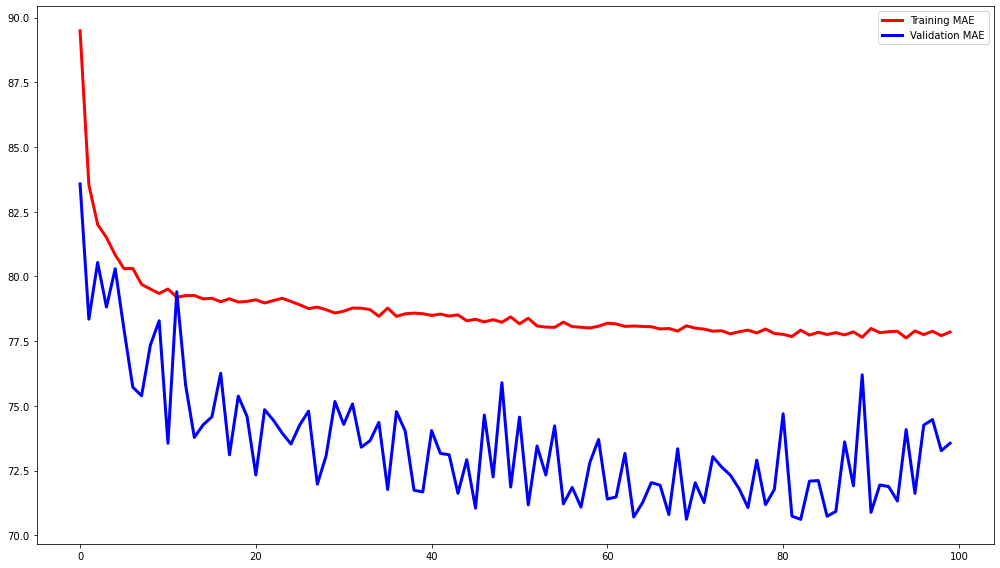

In [79]:
import matplotlib.pyplot as plt
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(figsize=(14,8))
num_epochs = model_history.shape[0]
ax.plot(np.arange(0, num_epochs), model_history["mae"], 
        label="Training MAE", lw=3, color='r')
ax.plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="Validation MAE", lw=3, color='b')
ax.legend()
plt.tight_layout()
plt.show()